In [1]:
# common import
import numpy as np
import os

# figure plotting
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# figures saving
PROJECT_ROOT_DIR = '.'
COMPETETION_ID = 'kaggle_houseprices'
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, 'images', COMPETETION_ID)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = os.path.join(IMAGE_PATH, fig_id + '.' + fig_extension)
    print('Saving figure', fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [2]:
# data import
import pandas as pd

DATA_PATH = os.path.join('datasets', 'kaggle_houseprices')
train_path = os.path.join(DATA_PATH, 'train.csv')
train_set = pd.read_csv(train_path)
test_path = os.path.join(DATA_PATH, 'test.csv')
test_set = pd.read_csv(test_path)

In [3]:
# Check out all the attributes and move on to data cleaning
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

(0, 800000)

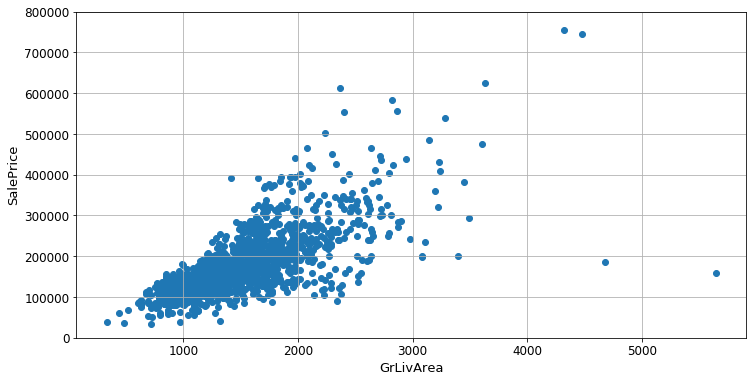

In [4]:
# Herustically, house price is linearly related to the living area.
plt.figure(figsize=(12,6))
plt.scatter(x=train_set.GrLivArea, y=train_set.SalePrice)
plt.grid(True)
plt.xlabel("GrLivArea", fontsize=13)
plt.ylabel("SalePrice", fontsize=13)
plt.ylim(0,800000)

In [5]:
# Two points down right should be the outliers, leave those points out to gain a linear trend.
train_set.drop(train_set[(train_set["GrLivArea"]>4000)&(train_set["SalePrice"]<300000)].index,inplace=True)

In [6]:
full=pd.concat([train_set,test_set], ignore_index=True)
full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 81 columns):
1stFlrSF         2917 non-null int64
2ndFlrSF         2917 non-null int64
3SsnPorch        2917 non-null int64
Alley            198 non-null object
BedroomAbvGr     2917 non-null int64
BldgType         2917 non-null object
BsmtCond         2835 non-null object
BsmtExposure     2835 non-null object
BsmtFinSF1       2916 non-null float64
BsmtFinSF2       2916 non-null float64
BsmtFinType1     2838 non-null object
BsmtFinType2     2837 non-null object
BsmtFullBath     2915 non-null float64
BsmtHalfBath     2915 non-null float64
BsmtQual         2836 non-null object
BsmtUnfSF        2916 non-null float64
CentralAir       2917 non-null object
Condition1       2917 non-null object
Condition2       2917 non-null object
Electrical       2916 non-null object
EnclosedPorch    2917 non-null int64
ExterCond        2917 non-null object
ExterQual        2917 non-null object
Exterior1st      291

/home/capsule/ml/env/lib/python3.5/site-packages/ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  """Entry point for launching an IPython kernel.


In [7]:
full.drop(['Id'],axis=1, inplace=True)
full.shape

(2917, 80)

In [8]:
# Handle lost values
a = full.isnull().sum()
a[a>0].sort_values(ascending=False)

PoolQC          2908
MiscFeature     2812
Alley           2719
Fence           2346
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageQual       159
GarageCond       159
GarageFinish     159
GarageYrBlt      159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrType        24
MasVnrArea        23
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Electrical         1
BsmtUnfSF          1
Exterior1st        1
Exterior2nd        1
TotalBsmtSF        1
GarageCars         1
BsmtFinSF2         1
BsmtFinSF1         1
KitchenQual        1
SaleType           1
GarageArea         1
dtype: int64

In [9]:
full['LotFrontage'].value_counts()

60.0     276
80.0     137
70.0     133
50.0     117
75.0     105
65.0      93
85.0      76
21.0      50
24.0      49
63.0      47
78.0      46
90.0      46
68.0      44
64.0      43
74.0      39
72.0      39
73.0      33
62.0      31
52.0      28
100.0     28
82.0      28
79.0      28
51.0      27
59.0      27
57.0      26
66.0      26
76.0      25
53.0      24
55.0      24
43.0      23
        ... 
122.0      2
116.0      2
149.0      2
150.0      2
174.0      2
155.0      1
123.0      1
135.0      1
111.0      1
117.0      1
131.0      1
200.0      1
22.0       1
136.0      1
28.0       1
31.0       1
25.0       1
313.0      1
133.0      1
126.0      1
152.0      1
168.0      1
144.0      1
138.0      1
137.0      1
182.0      1
119.0      1
195.0      1
153.0      1
141.0      1
Name: LotFrontage, Length: 128, dtype: int64

In [10]:
# LotFrontage looks continuous, use median to replace the missing value.
median = full['LotFrontage'].median()
full['LotFrontage'].fillna(median, inplace=True)

In [11]:
full['MSZoning'].value_counts()

RL         2263
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

In [12]:
# Replacing the missing value with the most frequent category
full['MSZoning'].fillna('RL', inplace=True)

In [13]:
full['Utilities'].value_counts()

AllPub    2914
NoSeWa       1
Name: Utilities, dtype: int64

In [14]:
# The difference between 'Utilities' is negligible, drop this attribute
full.drop(['Utilities'], axis=1, inplace=True)

In [15]:
full['Functional'].value_counts()

Typ     2715
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [16]:
# Likewise, fill the missing value with the most frequent one.
full['Functional'].fillna('Typ', inplace=True)

In [17]:
full['Electrical'].value_counts()

SBrkr    2669
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [18]:
full['Electrical'].fillna('SBrkr', inplace=True)

In [19]:
full['SaleType'].value_counts()

WD       2525
New       237
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [20]:
full['SaleType'].fillna('WD', inplace=True)

In [21]:
# For non-existing categorical and numerical values (say when there is no swimming pool, the PoolQC should be None)
# fill the missing value with None or 0.
cols1 = ['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'GarageQual', 'GarageCond', 'GarageFinish',
         'GarageYrBlt', 'GarageType', 'BsmtExposure', 'BsmtCond', 'BsmtQual', 'BsmtFinType2', 'BsmtFinType1', 
         'MasVnrType', 'Exterior1st', 'Exterior2nd', 'KitchenQual','SaleType']
for col in cols1:
    full[col].fillna('None', inplace=True)

cols2 = ['MasVnrArea', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageCars', 
         'BsmtFinSF2', 'BsmtFinSF1', 'GarageArea' ]
for col in cols2:
    full[col].fillna(0, inplace=True)

In [22]:
# Check out the missing value now
a = full.isnull().sum()
a[a>0].sort_values(ascending=False)

SalePrice    1459
dtype: int64

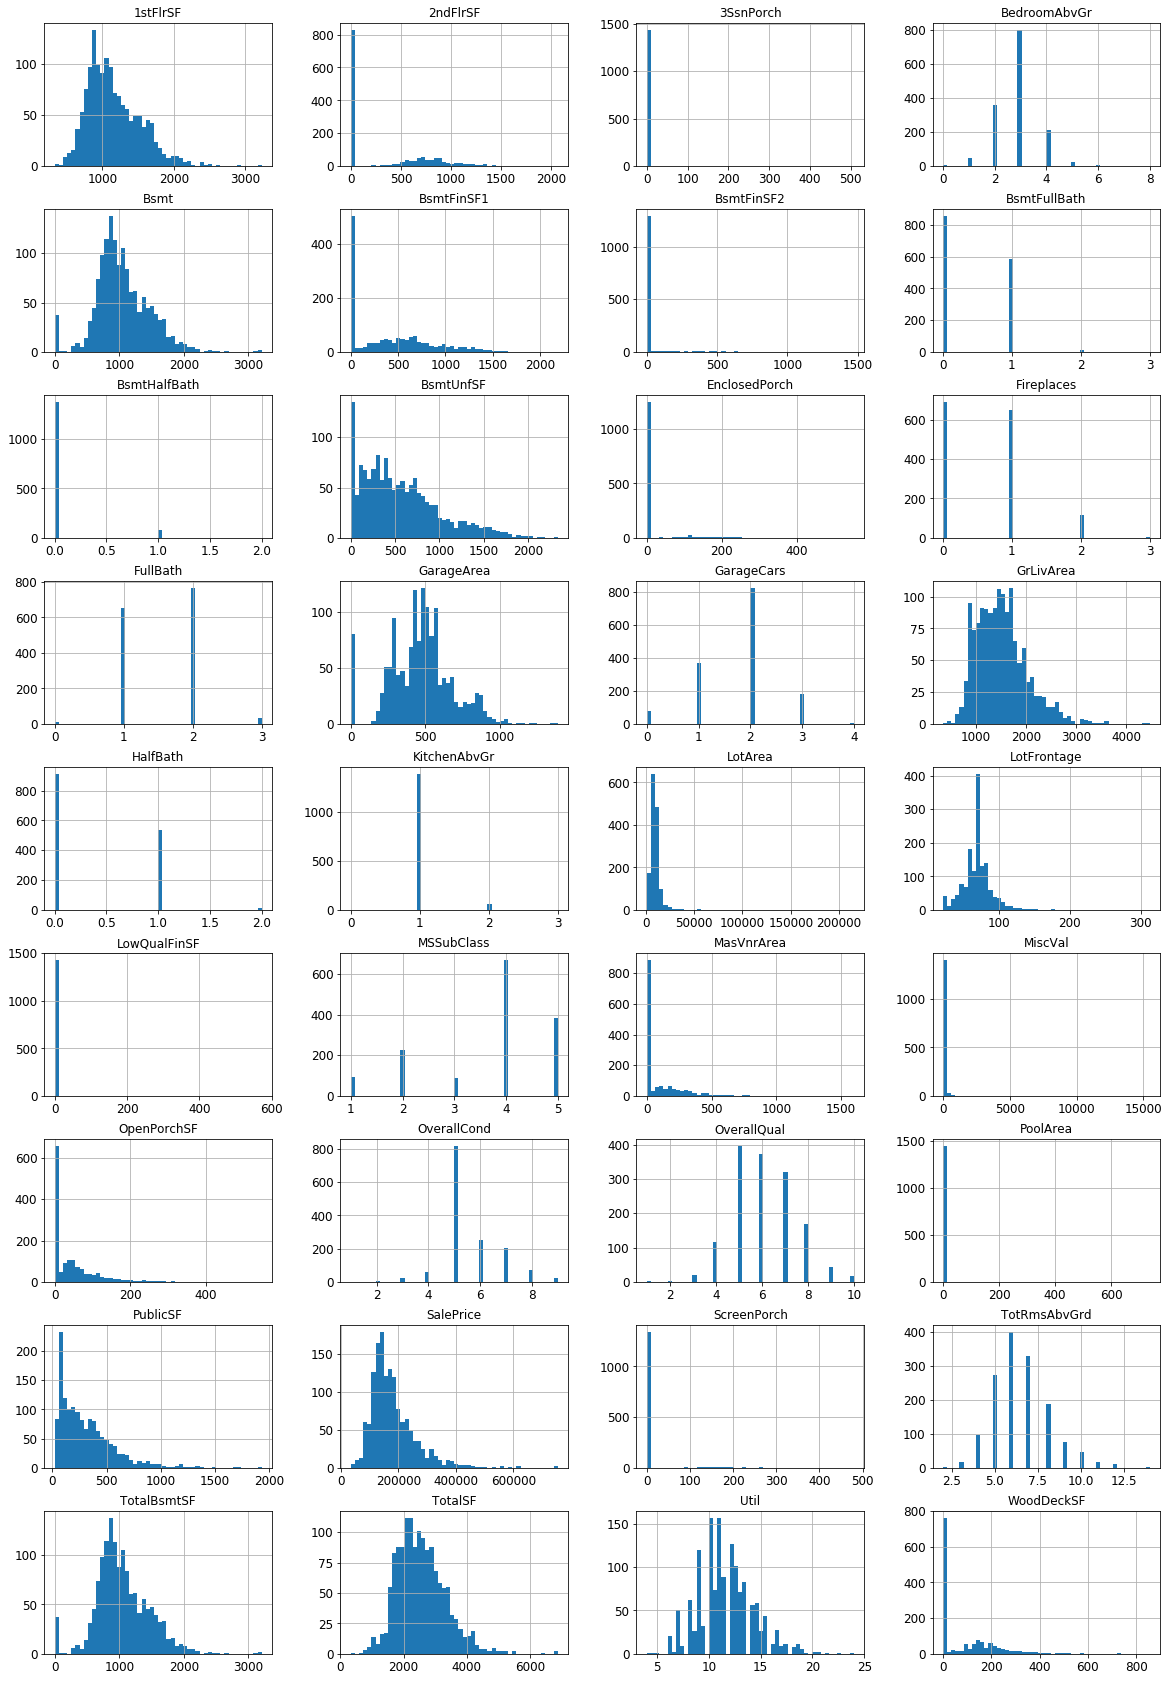

In [77]:
# Looks like the target house prices are the only missing now
# Draw the histogram for all the numerical attributes and observe their distribution.
train_set.hist(layout=(-1, 4),bins=50, figsize=(20, 30))
plt.show()

In [24]:
# Numerical attributes combination.
# You can also use the attributes adder class below.
full['TotalSF'] = full['1stFlrSF'] + full['2ndFlrSF'] + full['TotalBsmtSF']
full['Util'] = full['BedroomAbvGr'] + full['FullBath'] + full['HalfBath'] * 0.5 + full['BsmtFullBath'] + full['BsmtHalfBath'] * 0.5 + full['TotRmsAbvGrd']
full['Bsmt'] = full['BsmtFinSF1'] + full['BsmtFinSF2'] + full['BsmtUnfSF']
full['PublicSF'] = full['MasVnrArea'] + full['LotFrontage'] + full['WoodDeckSF'] + full['OpenPorchSF']

In [25]:
# After checking out the decription of the MSSubClass, we find out this class should be a categorical need remapping
full.groupby(['MSSubClass'])[['SalePrice']].agg(['mean','median','count'])

SalePrice                
                     mean    median count
MSSubClass                               
20          185224.811567  159250.0   536
30           95829.724638   99900.0    69
40          156125.000000  142500.0     4
45          108591.666667  107500.0    12
50          143302.972222  132000.0   144
60          240403.542088  216000.0   297
70          166772.416667  156000.0    60
75          192437.500000  163500.0    16
80          169736.551724  166500.0    58
85          147810.000000  140750.0    20
90          133541.076923  135980.0    52
120         200779.080460  192000.0    87
150                   NaN       NaN     0
160         138647.380952  146000.0    63
180         102300.000000   88500.0    10
190         129613.333333  128250.0    30

In [26]:
map_MSSubClass = {30:1, 45:1, 180:1, 50:2, 90:2, 190:2, 40:3, 85:3, 160:3, 20:4, 70:4, 75:4, 80:4, 60:5, 120:5}
full['MSSubClass'] = full['MSSubClass'].map(map_MSSubClass)

In [27]:
# Some numerical attributes turn out to be categorical attributes
NumStr = ['MoSold','YrSold','YearBuilt','YearRemodAdd','GarageYrBlt']
for col in NumStr:
    full[col]=full[col].astype(str)

In [28]:
# Check out how well our combined attributes correlated to the target in train set
train_set = full.head(train_set.shape[0])
corr_matrix = train_set.corr()
corr_matrix['SalePrice'].sort_values(ascending=False)

SalePrice        1.000000
TotalSF          0.832877
OverallQual      0.795774
GrLivArea        0.734968
TotalBsmtSF      0.651153
Bsmt             0.651153
GarageCars       0.641047
1stFlrSF         0.631530
GarageArea       0.629217
PublicSF         0.608669
Util             0.562983
FullBath         0.562165
TotRmsAbvGrd     0.537769
MasVnrArea       0.477810
Fireplaces       0.469862
MSSubClass       0.465504
BsmtFinSF1       0.409384
LotFrontage      0.352464
WoodDeckSF       0.324758
OpenPorchSF      0.321142
2ndFlrSF         0.320532
HalfBath         0.284590
LotArea          0.268179
BsmtFullBath     0.228459
BsmtUnfSF        0.214460
BedroomAbvGr     0.168245
ScreenPorch      0.111415
PoolArea         0.099490
3SsnPorch        0.044568
BsmtFinSF2      -0.011422
BsmtHalfBath    -0.016881
MiscVal         -0.021203
LowQualFinSF    -0.025625
OverallCond     -0.077948
EnclosedPorch   -0.128646
KitchenAbvGr    -0.135946
Name: SalePrice, dtype: float64

In [29]:
# Now bad! Notice that the TotalSF achieved the highest correlation.
y = train_set['SalePrice']
y.shape

(1458,)

In [30]:
# With 'Id', 'SalePrice' and 'Utilities' dropped and 4 combined attributes added
full.drop(['SalePrice'], axis=1, inplace=True)
full.shape

(2917, 82)

In [31]:
full2 = full.copy()

In [32]:
# Definition of the CategoricalEncoder class, copied from PR #9151.

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [33]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [34]:
# Attributes combination
'''
from sklearn.base import BaseEstimator, TransformerMixin

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, additional=1):
        self.additional = additional
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        if self.additional==1:
            customized_attributes = ...
            
            
            return np.c_[X, customized_attributes]
'''

'\nfrom sklearn.base import BaseEstimator, TransformerMixin\n\nclass CombinedAttributesAdder(BaseEstimator, TransformerMixin):\n    def __init__(self, additional=1):\n        self.additional = additional\n        \n    def fit(self, X, y=None):\n        return self\n    \n    def transform(self, X, y=None):\n        if self.additional==1:\n            customized_attributes = ...\n            \n            \n            return np.c_[X, customized_attributes]\n'

In [35]:
# Selecting numerical and categorical attributes
# Including all the attributes first, then prune them

num_attribs = []
cat_attribs = []
for i in range(full2.columns.shape[0]):
    if type(full2[full2.columns[i]][0]) == str:
        cat_attribs.append(full2.columns[i])
    else:
        num_attribs.append(full2.columns[i])

In [36]:
print('num_attribs:', len(num_attribs), '; cat_attribs:', len(cat_attribs))

num_attribs: 35 ; cat_attribs: 47


In [37]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, Imputer


num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense",handle_unknown='ignore')),
    ])

In [38]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [39]:
n_train = train_set.shape[0]
X_train = full2.head(n_train)
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.shape

(1458, 586)

In [40]:
cat_encoder = cat_pipeline.named_steps["cat_encoder"]
cat_one_hot_attribs = list(cat_encoder.categories_)
cat_one_hot_attribs

[array(['Grvl', 'None', 'Pave'], dtype=object),
 array(['1Fam', '2fmCon', 'Duplex', 'Twnhs', 'TwnhsE'], dtype=object),
 array(['Fa', 'Gd', 'None', 'Po', 'TA'], dtype=object),
 array(['Av', 'Gd', 'Mn', 'No', 'None'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf'], dtype=object),
 array(['ALQ', 'BLQ', 'GLQ', 'LwQ', 'None', 'Rec', 'Unf'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'None', 'TA'], dtype=object),
 array(['N', 'Y'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNe',
        'RRNn'], dtype=object),
 array(['Artery', 'Feedr', 'Norm', 'PosA', 'PosN', 'RRAe', 'RRAn', 'RRNn'],
       dtype=object),
 array(['FuseA', 'FuseF', 'FuseP', 'Mix', 'SBrkr'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'Po', 'TA'], dtype=object),
 array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object),
 array(['AsbShng', 'AsphShn', 'BrkComm', 'BrkFace', 'CBlock', 'CemntBd',
        'HdBoard', 'ImStucc', 'MetalSd', 'Plywood', 'Stone', 'Stucco',
        'Viny

In [41]:
# Generate the index after the pipeline for attributes importance analysis
# cat_index follow behind the num_index alphebetically

num_col_index, cat_col_index  = [], []
num_attrib_index, cat_attrib_index = 0, 0

for i in range(X_train.columns.shape[0]):
    this_attrib = X_train.columns[i]
    if this_attrib in num_attribs:
        num_col_index.append(this_attrib)
        num_attrib_index += 1 # seems unnecessary
    else:
        for j in range(cat_one_hot_attribs[cat_attrib_index].shape[0]):
            this_cat = this_attrib + '_' + cat_one_hot_attribs[cat_attrib_index][j]
            cat_col_index.append(this_cat)
        cat_attrib_index += 1   
        
X_train_prepared_col_index = num_col_index + cat_col_index

In [42]:
X_train_prepared_col_index

['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MSSubClass',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF',
 'TotalSF',
 'Util',
 'Bsmt',
 'PublicSF',
 'Alley_Grvl',
 'Alley_None',
 'Alley_Pave',
 'BldgType_1Fam',
 'BldgType_2fmCon',
 'BldgType_Duplex',
 'BldgType_Twnhs',
 'BldgType_TwnhsE',
 'BsmtCond_Fa',
 'BsmtCond_Gd',
 'BsmtCond_None',
 'BsmtCond_Po',
 'BsmtCond_TA',
 'BsmtExposure_Av',
 'BsmtExposure_Gd',
 'BsmtExposure_Mn',
 'BsmtExposure_No',
 'BsmtExposure_None',
 'BsmtFinType1_ALQ',
 'BsmtFinType1_BLQ',
 'BsmtFinType1_GLQ',
 'BsmtFinType1_LwQ',
 'BsmtFinType1_None',
 'BsmtFinType1_Rec',
 'BsmtFinType1_Unf',
 'BsmtFinType2_A

In [43]:
len(X_train_prepared_col_index)

586

In [44]:
numeric_feats = full2.dtypes[full2.dtypes != "object"].index
numeric_feats

Index(['1stFlrSF', '2ndFlrSF', '3SsnPorch', 'BedroomAbvGr', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF',
       'EnclosedPorch', 'Fireplaces', 'FullBath', 'GarageArea', 'GarageCars',
       'GrLivArea', 'HalfBath', 'KitchenAbvGr', 'LotArea', 'LotFrontage',
       'LowQualFinSF', 'MSSubClass', 'MasVnrArea', 'MiscVal', 'OpenPorchSF',
       'OverallCond', 'OverallQual', 'PoolArea', 'ScreenPorch', 'TotRmsAbvGrd',
       'TotalBsmtSF', 'WoodDeckSF', 'TotalSF', 'Util', 'Bsmt', 'PublicSF'],
      dtype='object')

/home/capsule/ml/env/lib/python3.5/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "



 mu = 180932.92 and sigma = 79467.79



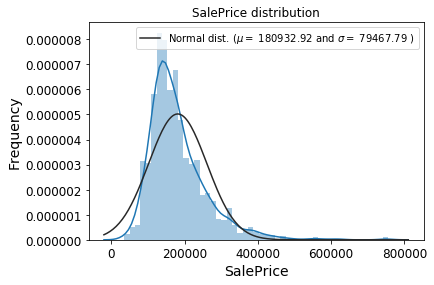

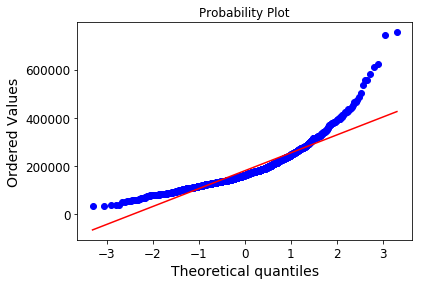

In [45]:
# Linear model need a normal-distributed target 'y' to be more functional
# Unskew the skewed data
# The skew part is from https://blog.csdn.net/Irving_zhang/article/details/78561105

from scipy import stats
from scipy.stats import norm, skew
import seaborn as sns

sns.distplot(y , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(y)
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(y, plot=plt)
plt.show()


In [46]:
y_log = np.log(y)

In [47]:
y_log.shape

(1458,)

In [48]:
numeric_feats = full2.dtypes[full2.dtypes != "object"].index
# Check the skew of all numerical features
skewed_feats = full2[numeric_feats].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


In [49]:
skewness = skewness[abs(skewness) > 0.75]
print("There are {} skewed numerical features to Box Cox transform".format(skewness.shape[0]))

from scipy.special import boxcox1p
skewed_features = skewness.index
lam = 0.15
for feat in skewed_features:
    full2[feat] = boxcox1p(full2[feat], lam)

There are 35 skewed numerical features to Box Cox transform


In [50]:
X_train_prepared.shape

(1458, 586)

In [51]:
n_test = test_set.shape[0]
X_test = full2.tail(n_test)
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(1459, 586)

In [52]:
# Attributes selection
# Some of the covariates are highly correlated, using Elastic Net

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet(alpha=0.0001, max_iter=10000)
elasticnet.fit(X_train_prepared, y_log)

ElasticNet(alpha=0.0001, copy_X=True, fit_intercept=True, l1_ratio=0.5,
      max_iter=10000, normalize=False, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [53]:
FI_elasticnet = pd.DataFrame({"Feature Importance":elasticnet.coef_}, index=X_train_prepared_col_index)
FI_elasticnet.sort_values("Feature Importance",ascending=False)

,Feature Importance
GarageYrBlt_1927.0,0.201266
PoolQC_Gd,0.187717
YearBuilt_1932,0.154065
YearBuilt_1987,0.118696
YearBuilt_1936,0.106684
GarageQual_Ex,0.106049
GarageYrBlt_1922.0,0.105847
GarageYrBlt_1964.0,0.105366
Neighborhood_StoneBr,0.104147
YearBuilt_2010,0.102597


In [54]:
num_trivial = []
elasticnet_trivial_index = FI_elasticnet[np.abs(FI_elasticnet["Feature Importance"]) <= 1e-3].index
for i in range(elasticnet_trivial_index.shape[0]):
    if elasticnet_trivial_index[i] in num_attribs:
        num_trivial.append(elasticnet_trivial_index[i])

num_trivial

['BedroomAbvGr', 'BsmtUnfSF', 'MasVnrArea', 'Util', 'Bsmt']

In [55]:
# The relationship between high-scored cat_attrib and saleprice is vague, 
# the reason of which might be the dominant cat in that attrib (None in PoolQC)
# One good thing is that the 'GrLivArea' achieve high score, which is intuitive.
# Try lasso

from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.001, max_iter=10000)
lasso.fit(X_train_prepared, y_log)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [56]:
FI_lasso = pd.DataFrame({"Feature Importance":lasso.coef_}, index=X_train_prepared_col_index)
FI_lasso.sort_values("Feature Importance",ascending=False)

,Feature Importance
TotalSF,0.084202
OverallQual,0.082961
Neighborhood_Crawfor,0.072361
GrLivArea,0.057144
Functional_Typ,0.049848
KitchenQual_Ex,0.046121
OverallCond,0.045717
SaleType_New,0.045145
Foundation_PConc,0.043297
Condition1_Norm,0.040597


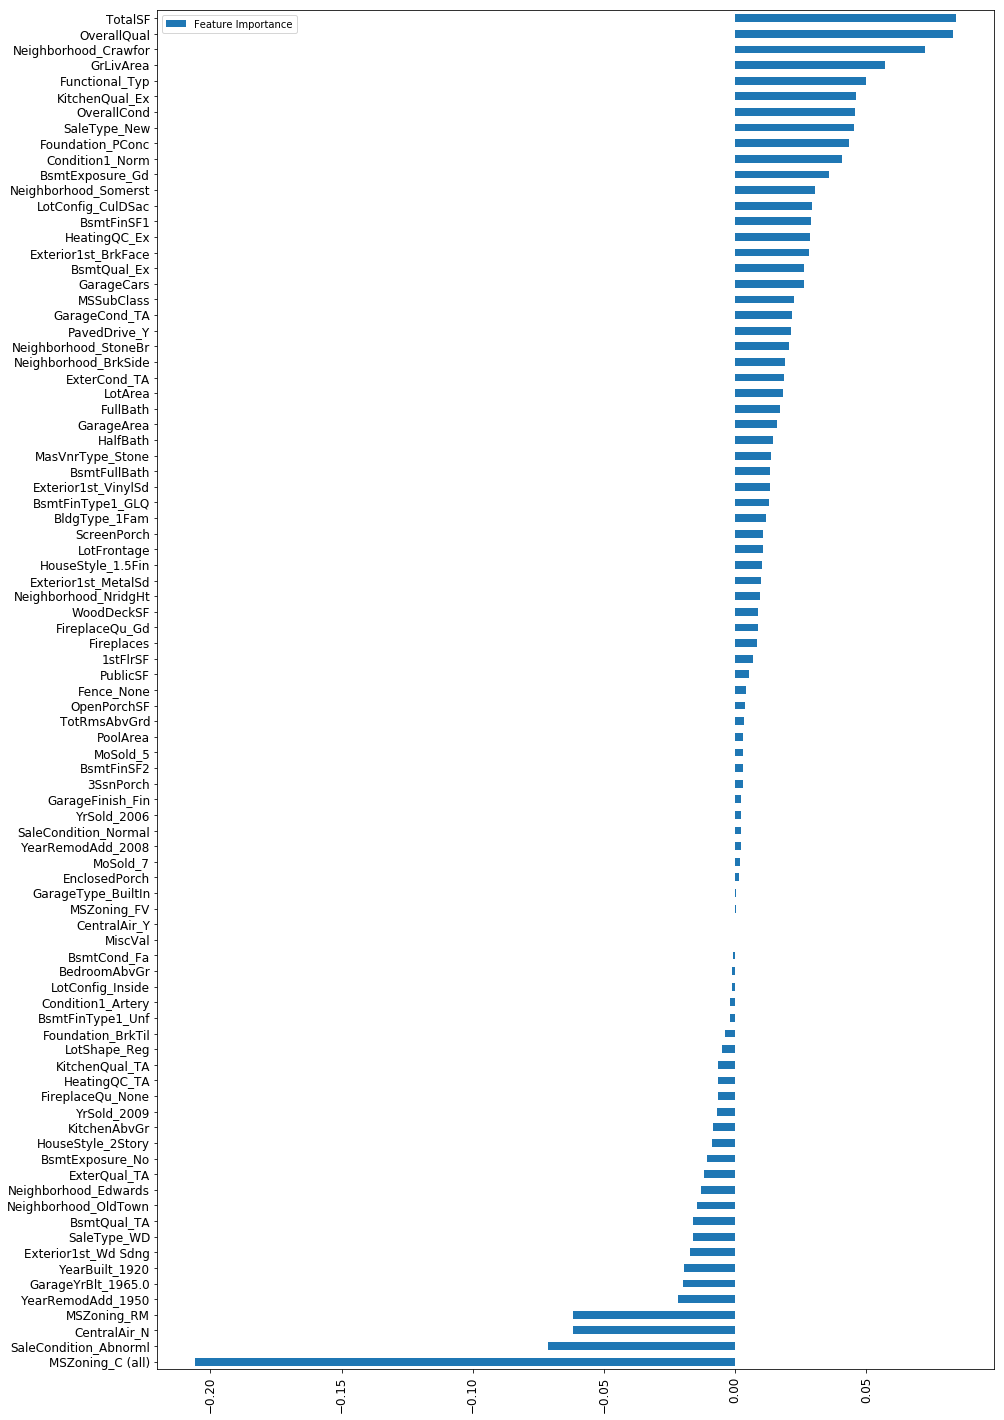

In [57]:
# TotalSF achieved the highest score. This model can be persuasive.
FI_lasso[FI_lasso["Feature Importance"]!=0].sort_values("Feature Importance").plot(kind="barh",figsize=(15,25))
plt.xticks(rotation=90)
plt.show()

In [58]:
num_trivial = []
lasso_trivial_index = FI_lasso[np.abs(FI_lasso["Feature Importance"]) <= 1e-3].index
for i in range(elasticnet_trivial_index.shape[0]):
    if lasso_trivial_index[i] in num_attribs:
        num_trivial.append(lasso_trivial_index[i])

num_trivial

['2ndFlrSF',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'TotalBsmtSF',
 'Util',
 'Bsmt']

In [59]:
# Reselect the attrib
num_to_drop = ['LowQualFinSF', 'TotalBsmtSF']
for drop in num_to_drop:
    if drop in num_attribs:
        num_attribs.remove(drop)

len(num_attribs)

33

In [60]:
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('cat_encoder', CategoricalEncoder(encoding="onehot-dense",handle_unknown='ignore')),
    ])

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

In [61]:
n_train = train_set.shape[0]
X_train = full2.head(n_train)
X_train_selected_prepared = full_pipeline.fit_transform(X_train)
X_train_selected_prepared.shape

(1458, 584)

In [62]:
n_test = test_set.shape[0]
X_test = full2.tail(n_test)
X_test_selected_prepared = full_pipeline.transform(X_test)
X_test_selected_prepared.shape

(1459, 584)

In [63]:
# Model selection part is from kernel https://www.kaggle.com/massquantity/all-you-need-is-pca-lb-0-11421-top-4
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.linear_model import ElasticNet, SGDRegressor, BayesianRidge
from sklearn.kernel_ridge import KernelRidge
from xgboost import XGBRegressor

In [64]:
def rmse_cv(model,X,y):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=5))
    return rmse

In [65]:
models = [LinearRegression(), Ridge(), Lasso(alpha=0.01,max_iter=10000), RandomForestRegressor(),
          GradientBoostingRegressor(), SVR(), LinearSVR(), ElasticNet(alpha=0.001,max_iter=10000),
          SGDRegressor(max_iter=1000,tol=1e-3), BayesianRidge(), 
          KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5),
          ExtraTreesRegressor(),XGBRegressor()]

In [66]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train_prepared, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 702643927.909631, 339832538.2200
Ridge: 0.127351, 0.0079
Lasso: 0.135431, 0.0072
RF: 0.147778, 0.0024
GBR: 0.123737, 0.0064
SVR: 0.118672, 0.0055
LinSVR: 0.155057, 0.0125
Ela: 0.113240, 0.0057
SGD: 0.259275, 0.0226
Bay: 0.115751, 0.0057
Ker: 0.114528, 0.0052
Extra: 0.139371, 0.0088
Xgb: 0.126053, 0.0054


In [67]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train_selected_prepared, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 1685812499.005129, 1712210954.5253
Ridge: 0.127795, 0.0091
Lasso: 0.136977, 0.0083
RF: 0.144247, 0.0083
GBR: 0.124362, 0.0069
SVR: 0.118051, 0.0065
LinSVR: 0.147225, 0.0133
Ela: 0.111411, 0.0064
SGD: 0.245065, 0.0126
Bay: 0.115329, 0.0070
Ker: 0.114409, 0.0062
Extra: 0.141497, 0.0079
Xgb: 0.126165, 0.0056


In [68]:
from sklearn.decomposition import PCA, KernelPCA
pca = PCA(n_components=580)

In [69]:
X_train_prepared_pca = pca.fit_transform(X_train_prepared)
X_test_prepared_pca = pca.fit_transform(X_test_prepared)

In [70]:
print('X_train_prepared_pca: {}, X_test_prepared_pca: {}, y_log: {}'.format(X_train_prepared_pca.shape, X_test_prepared_pca.shape, y_log.shape))

X_train_prepared_pca: (1458, 580), X_test_prepared_pca: (1459, 580), y_log: (1458,)


In [71]:
names = ["LR", "Ridge", "Lasso", "RF", "GBR", "SVR", "LinSVR", "Ela","SGD","Bay","Ker","Extra","Xgb"]
for name, model in zip(names, models):
    score = rmse_cv(model, X_train_prepared_pca, y_log)
    print("{}: {:.6f}, {:.4f}".format(name,score.mean(),score.std()))

LR: 2460872568.839087, 2121772311.9765
Ridge: 0.127351, 0.0079
Lasso: 0.136888, 0.0042
RF: 0.157279, 0.0039
GBR: 0.139814, 0.0083
SVR: 0.118686, 0.0055
LinSVR: 0.151334, 0.0097
Ela: 0.116393, 0.0051
SGD: 0.171943, 0.0120
Bay: 0.115751, 0.0057
Ker: 0.114871, 0.0055
Extra: 0.158786, 0.0050
Xgb: 0.143741, 0.0057


In [73]:
'''
Project needs more tuning for:
    Xdata selection, including attributes-to-drop, attributes-to-combine and PCA number to choose;
    Model type and model hyperparameters selection;

By instinct, the house price should linearly related to the feature, so we stick to the linear attributes and linear model.

Also, we need some prefessional insights for some attributes processing.
    For example, some sub-attributes of a categorical attribute 'YearBuilt' have significant weights in the
    ElasticNet model above, which could be a indication of some specific historical events like economy booming, 
    policy change, natural effects, etc. With more insights, we make better map to bucket the important attributes.

And we need cross-validation or Ensemble learning for better hyperparameters and better model.

Right now, say if I go with the X_train_selected_prepared and ElasticNet(alpha=0.001,max_iter=10000),
which is our winner so far.
'''
ela = ElasticNet(alpha=0.001,max_iter=10000)
ela.fit(X_train_selected_prepared, y_log)
pred = np.exp(ela.predict(X_test_selected_prepared))

In [75]:
result = pd.DataFrame({'Id':test_set.Id, 'SalePrice':pred})
result.to_csv("submission.csv",index=False)

In [76]:
# Final result: rmse = 0.11973, ranked 805/5416 and there is much more place to improve.